In [ ]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# root = Path("/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/")
# root = Path("/mnt/ssd-1/alexm/w2s/results/sciq_support_contains/")
root = Path("/mnt/ssd-1/alexm/w2s/results/ethics_deontology_excuse_only/")

In [20]:
# all subdirectories of the form `run_name`*
# title = "Amazon Polarity \"look at title only\" multiple oracle epochs"
# title = "Sciq with support \"does context contain `ans`\""
suffix = "_sft2"
data = []
configs = []
subdirs = [
    f"am_title_0{suffix}",
    f"am_title_32x48{suffix}",
    # f"am_title_128x12{suffix}",
    f"am_title_512{suffix}",
    f"am_title_512x4{suffix}",
    # f"am_title_2000{suffix}",
    # f"am_title_2000x4{suffix}",
    f"am_title_8000{suffix}",
    # "am_title_0_orepoch",
    # "am_title_32x48_orepoch",
    # "am_title_128x12_orepoch",
    # "am_title_512_orepoch",
    # "am_title_512x4_orepoch",
    # "am_title_2000_orepoch",
    # "am_title_2000x4_orepoch",
    # "am_title_8000_orepoch",
    # "am_title_0_matching",
    # "am_title_32x48_matching",
    # "am_title_128x12_matching",
    # "am_title_512_matching",
    # "am_title_512x4_matching",
    # "am_title_2000_matching",
    # "am_title_2000x4_matching",
    # "am_title_8000_matching",
    # "ss_contains_0",
    # "ss_contains_32x48",
    # "ss_contains_128x12",
    # "ss_contains_512",
    # "ss_contains_512x4",
    # "ss_contains_2000",
    # "ss_contains_2000x4",
    # "ss_contains_8000",
    # 'am_title_0',
    # 'am_title_32x48',
    # 'am_title_128x12',
    # 'am_title_512',
    # 'am_title_512x4',
    # 'am_title_2000',
    # 'am_title_2000x4',
    # 'am_title_8000',
]

names = []
for name in subdirs:
    d = root / name
    # df = pd.read_json(d / "results.json", orient="records", lines=True)
    dicts = []
    for fname in d.glob("results_*.json"):
        with open(fname) as f:
            dicts.append(json.load(f))
    if len(dicts) == 0:
        continue
    df = pd.DataFrame(dicts).sort_values("num_oracle")
    # with open(d / "config.json") as f:
    #     config = json.load(f)
    data.append(df)
    names.append(name)
    # configs.append(config)


In [25]:
data[1]

,auroc,acc,auroc_against_weak,acc_against_weak,weak_soft_labels,num_weak,num_oracle,oracle_ids,ids,calibrated_logodds,gt_soft_labels
1,0.925848,0.854000,0.893307,0.819000,"[0.7732163667678833, 0.3081902265548706, 0.234...",32,0,[],"[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[0.609375, -0.04357147216796875, -0.2607421875...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
6,0.931205,0.708667,0.885839,0.713000,"[0.7732163667678833, 0.3081902265548706, 0.234...",32,4,"[165fb7c0, d261facc, 59d70839, 9089959b]","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[-4.734375, -5.515625, -7.4375, -6.828125, 6.1...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
5,0.925290,0.810667,0.883546,0.789667,"[0.7732163667678833, 0.3081902265548706, 0.234...",32,16,"[0b2875b2, 13878dfb, 395e8287, 40e0a328, 53fb3...","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[0.7578125, 7.234375, -7.921875, -7.390625, 8....","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
4,0.981245,0.947333,0.921749,0.875000,"[0.7732163667678833, 0.3081902265548706, 0.234...",32,64,"[30a900d5, 0b2875b2, 69d1ca0f, 917f9b38, 1242a...","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[9.25, 9.21875, -10.34375, -10.375, 8.71875, -...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
0,0.990007,0.966667,0.899895,0.861667,"[0.7732163667678833, 0.3081902265548706, 0.234...",32,256,"[850fc54f, e7df8319, 7f329aa8, 84b3b1ac, e660b...","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[6.6875, 5.984375, -7.34375, -6.578125, 5.9843...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
3,0.992837,0.970333,0.929898,0.858000,"[0.7732163667678833, 0.3081902265548706, 0.234...",32,1024,"[850fc54f, 0e515d36, 240c98b0, 97928a76, bc7ea...","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[6.40625, 5.5625, -6.671875, -6.046875, 6.2187...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."
2,0.994496,0.974000,0.923934,0.855000,"[0.7732163667678833, 0.3081902265548706, 0.234...",32,4096,"[850fc54f, 3e677108, d53443eb, 97928a76, e5a51...","[31103764, 92dbe902, 94f2476d, b8888357, 64873...","[6.40625, 5.328125, -7.03125, -5.765625, 5.578...","[1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, ..."


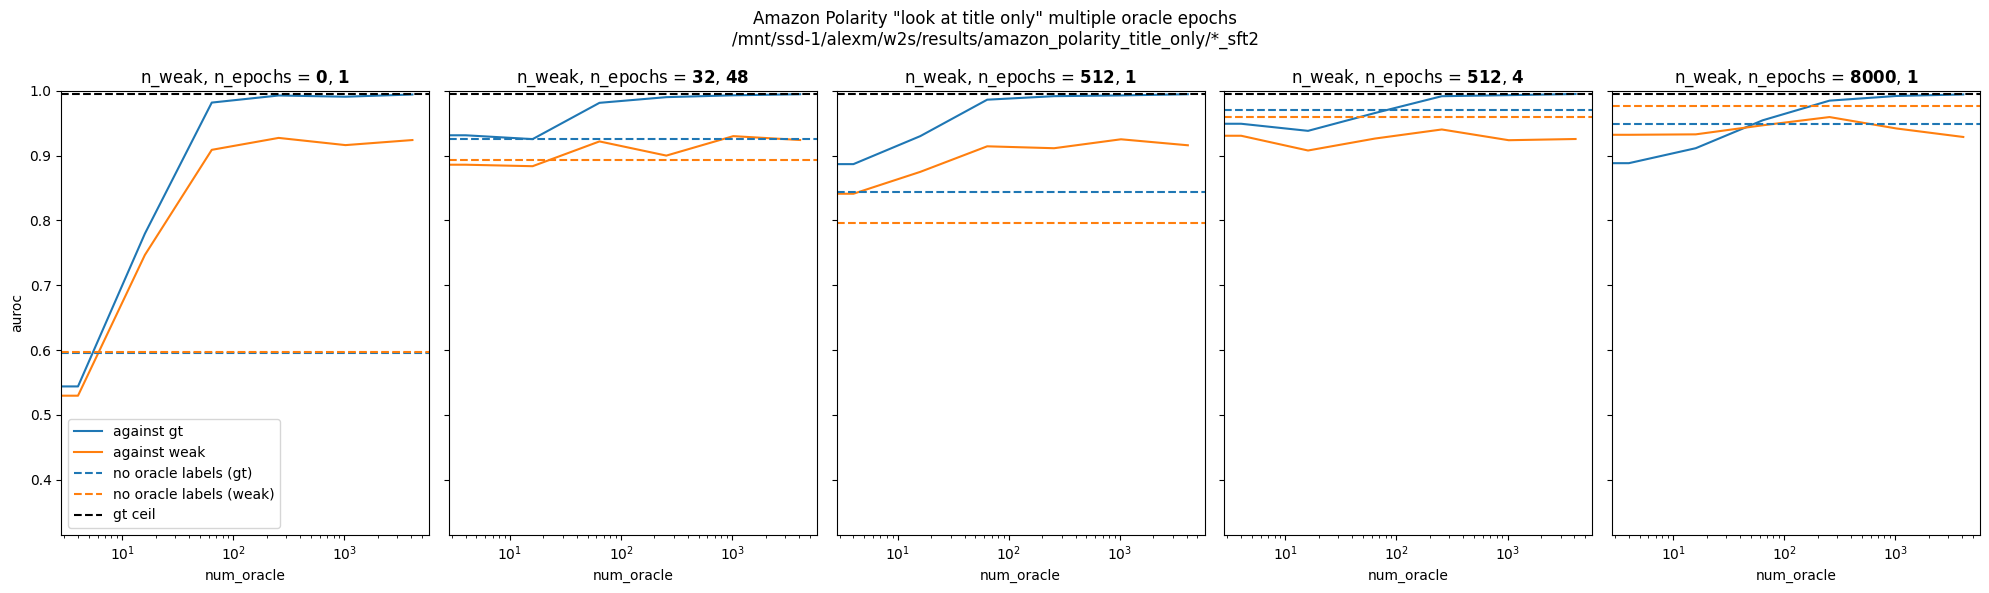

In [24]:
# I want a horizontal grid of aligned subplots, one for each n_weak, with x-axis=n_oracle, and y_axis=auroc

rows, cols = 1, 5
fig, axs = plt.subplots(rows, cols, figsize=(20, 6), sharey=True, sharex=True)
metric = "auroc"
for i, (df, name) in enumerate(zip(data, names)):
    if i == 0:
        gt_ceil = df[metric].max()
    ax = axs[i // cols, i % cols] if rows > 1 else axs[i % cols]
    plt.sca(ax)
    plt.ylim(0.315, 1)
    sns.lineplot(x="num_oracle", y=metric, data=df, label="against gt" if i == 0 else None)
    sns.lineplot(x="num_oracle", y=f"{metric}_against_weak", data=df, label="against weak" if i == 0 else None)
    # horizontal lines for num_oracle = 0
    zero_row = df[df["num_oracle"] == 0]
    ax.axhline(zero_row[metric].values[0], color="tab:blue", linestyle="--", label="no oracle labels (gt)" if i == 0 else None)
    ax.axhline(zero_row[f"{metric}_against_weak"].values[0], color="tab:orange", linestyle="--", label="no oracle labels (weak)" if i == 0 else None)
    ax.axhline(gt_ceil, color="black", linestyle="--", label="gt ceil" if i == 0 else None)
    if i == 0:
        plt.legend()

    last = name.split("_")[-2]
    if "x" in last:
        n_weak, n_epochs =last.split("x")
    else:
        n_weak = last
        n_epochs = "1"

    plt.title("n_weak, n_epochs = $\mathbf{" + n_weak + "}$, $\mathbf{" + n_epochs + "}$")
    plt.semilogx()
    plt.xlabel("num_oracle")
    plt.ylabel(metric)

plt.suptitle(f"{title}\n{root}/*{suffix}")
plt.tight_layout()
plt.show()

# multiple seeds

In [4]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

root = Path("/mnt/ssd-1/alexm/w2s/results/ethics_deontology_excuse_only/")
title = "Ethics Deontology excuse only"
prefix = "70B_ethics_excuse"
# root = Path("/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/")
# title = "Amazon Polarity \"look at title only\""
# prefix = "am_title"
# root = Path("/mnt/ssd-1/alexm/w2s/results/sciq_support_contains/")
# title = "Sciq with support \"does context contain `ans`\""
# prefix = "ss_contains"
min_num_oracle = 1

metric = "auroc"
sft_n_weak, sft_n_epochs = "1", "0"
sft_subdirs = root.glob(f"{prefix}_{sft_n_weak}x{sft_n_epochs}_seed*_sft")
active_n_weak, active_n_epochs = "32", "48"
active_subdirs = root.glob(f"{prefix}_{active_n_weak}x{active_n_epochs}_seed*_active")

# x-axis: num_oracle, y-axis: auroc
# one line for sft, one line for active, each with shaded error bars

sft_data = []
active_data = []
for name in sft_subdirs:
    d = name
    for fname in d.glob("results_*.json"):
        with open(fname) as f:
            sft_data.append(json.load(f))
for name in active_subdirs:
    d = name
    for fname in d.glob("results_*.json"):
        with open(fname) as f:
            active_data.append(json.load(f))

sft_df = pd.DataFrame(sft_data).sort_values("num_oracle")
active_df = pd.DataFrame(active_data).sort_values("num_oracle")
sft_df = sft_df[sft_df["num_oracle"] >= min_num_oracle]
active_df = active_df[active_df["num_oracle"] >= min_num_oracle]

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.sca(ax)
plt.ylim(0.5, 1)
# plt.axhline(0.994, color="black", linestyle="--", label="gt ceil")  # NOTE: this is a placeholder
sns.lineplot(x="num_oracle", y=metric, data=sft_df, errorbar="sd", label=f"sft {sft_n_weak}x{sft_n_epochs} weak ($\pm$ sd)")
sns.lineplot(x="num_oracle", y=metric, data=active_df, errorbar="sd", label=f"active {active_n_weak}x{active_n_epochs} weak ($\pm$ sd)")
plt.semilogx(base=2)
plt.xlabel("num_oracle")
plt.ylabel(metric)
plt.legend()
plt.title(title)
plt.tight_layout()
plt.show()

KeyError: 'num_oracle'

In [44]:
import pandas as pd
import json
from pathlib import Path
from collections import defaultdict

root = Path("/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/")
globs = ["am_title_online_sampling_s1_*", "am_title_temp0.25_s3_*", "am_title_temp0.7_s3_*", "am_title_debug_*", "am_title_newseed_*", "am_title_newseed2_*", "am_title_online_sampling_s2_*", "am_title_online_sampling_s2_*1"] #"am_title_one_epoch_*"]

def remove_large_entries(r):
    r = r.copy()
    for k in {"weak_soft_labels", "ids", "oracle_ids", "calibrated_logodds", "gt_soft_labels"}:
        if k in r:
            del r[k]
    return r


datas = []
for glob in globs:
    subdirs = root.glob(glob)
    
    for subdir in subdirs:
        try:
            data = remove_large_entries(json.load((subdir / "results.json").open()))
            cfg = json.load((subdir / "config.json").open())
            data.update(cfg)
            data["cfg"] = cfg
            data.update({"method": subdir.name})
            print(subdir)
        except FileNotFoundError:
            print(f"missing {subdir}")
            continue
        
        datas.append(data)
df = pd.DataFrame(datas)

missing /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_online_sampling_s1_0
missing /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_online_sampling_s1_2
missing /mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_online_sampling_s1_1
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.25_s3_4
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.25_s3_1
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.25_s3_0
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.25_s3_2
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.25_s3_3
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.7_s3_4
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.7_s3_1
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.7_s3_3
/mnt/ssd-1/alexm/w2s/results/amazon_polarity_title_only/am_title_temp0.7_s3_2
/mnt/ssd-1/

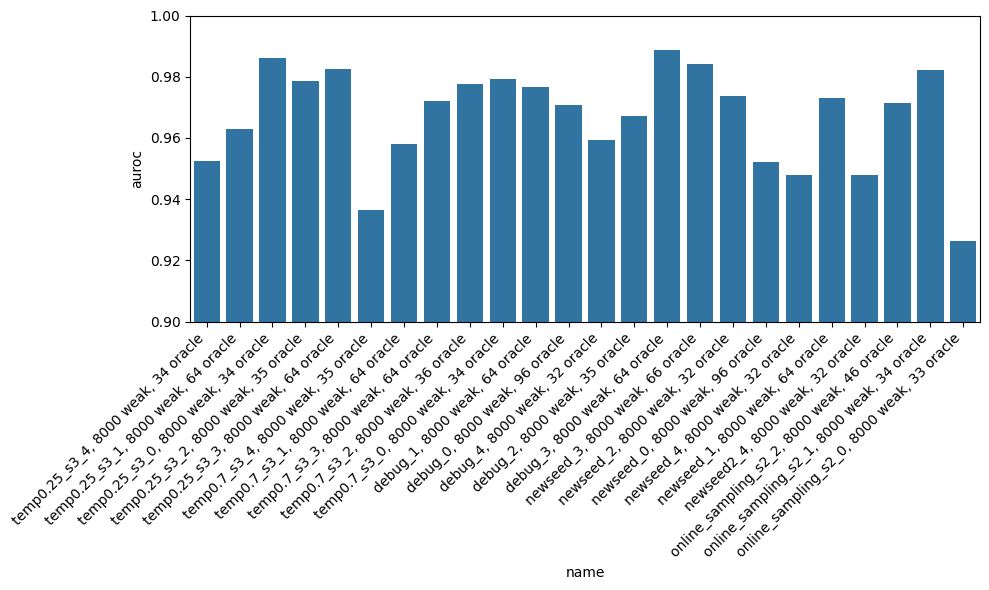

In [47]:
# I want a plot of AUROC vs method (with num_oracle, num_weak) in the method name
import seaborn as sns
import matplotlib.pyplot as plt

df["name"] = df.apply(lambda r: r['method'].replace("am_title_", "") + f", {r['num_weak']} weak, {r['num_oracle']} oracle", axis=1)

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
plt.sca(ax)
plt.ylim(0.9, 1)
sns.barplot(x="name", y="auroc", data=df)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


In [39]:
sorted_df = df.sort_values("auroc", ascending=False)
for i, row in sorted_df.iloc[:5].iterrows():
    print(row["name"], row["auroc"])
    # cfg_str = json.dumps(row["cfg"], indent=2)
    # print(cfg_str, "\n\n\n\n\n\n")

debug_3, 8000 weak, 64 oracle 0.988709568977356
temp0.25_s3_0, 8000 weak, 34 oracle 0.9862375855445862
newseed_3, 8000 weak, 66 oracle 0.9842044711112976
temp0.25_s3_3, 8000 weak, 64 oracle 0.9825111031532288
temp0.7_s3_0, 8000 weak, 34 oracle 0.9792786240577698


In [8]:
[(setting, d["num_oracle"], d["auroc"]) for setting, dat in datas.items() for d in dat]

[(4, 34, 0.9525691270828247),
 (4, 35, 0.9364919066429138),
 (1, 64, 0.9628642797470093),
 (1, 64, 0.9579855799674988),
 (0, 34, 0.9862375855445862),
 (0, 34, 0.9792786240577698),
 (2, 35, 0.9784435629844666),
 (2, 36, 0.9777633547782898),
 (3, 64, 0.9825111031532288),
 (3, 64, 0.9719114303588867)]

# Salience

In [1]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
runs = api.runs("eleutherai/huggingface")
runs_by_name = {run.name: run for run in runs}

In [11]:
import numpy as np
from scipy import integrate

def compute_auc(run):
    
    # Extract the eval/test_loss history
    history = run.scan_history(keys=["eval/test_loss", "train/global_step", "eval/test_auroc"])
    losses = [row["eval/test_loss"] for row in history]
    steps = [row["train/global_step"] for row in history]
    aurocs = [row["eval/test_auroc"] for row in history]
    try:
        batch_size = run.config.get("per_device_train_batch_size") * run.config.get("gradient_accumulation_steps")
    except TypeError:
        print(f"Run '{run.name}' does not have the necessary config values for AUC calculation.")
        return
    
    if isinstance(losses, list) and len(losses) > 1:
        aurocs = np.array(aurocs)
        near_max_idxs = np.nonzero(aurocs > 0.5 + 0.95 * (aurocs.max() - 0.5))
        first_good_idx = near_max_idxs[0][0] if len(near_max_idxs[0]) > 0 else len(losses) - 1
        smallest_good_num_points = steps[first_good_idx] * batch_size
        
        # Assuming the x-axis is the step or epoch number
        x = np.array(steps)
        losses = np.array(losses)

        try:
            integrate_to = (x == 60).nonzero()[0][0]
        except IndexError:
            print(f"Run '{run.name}' does not have enough data points for AUC calculation.")
            return
        
        x = x[:integrate_to]
        losses = losses[:integrate_to]
        aurocs = aurocs[:integrate_to]
        
        # Compute the area under the curve
        auc = integrate.simpson(losses, x=x)
        salience = integrate.simpson(aurocs, x=x)
        
        auc_result = {
            'name': run.name,
            'loss_auc': auc,
            'salience': salience,
            'steps': steps,
            'losses': losses,
            'aurocs': aurocs,
            'seed': run.config.get("seed"),
            'smallest_good_num_points': smallest_good_num_points
        }
    else:
        print(f"Run '{run.name}' does not have enough data points for AUC calculation.")
        return
    
    return auc_result

In [12]:
# from datasets import load_from_disk
# from sklearn.metrics import roc_auc_score, accuracy_score

# ds_names = ["boolq_Qwen1.5-0.5B"]
# ds_names += [f"{ds_name}_{prompt}" for ds_name in ["paws_consistency", "ethics_deontology_excuse_only", "amazon_polarity_title_only", "sciq_support_contains"] for prompt in ["weak_amplified", "both_amplified", "neither_amplified", "gt_amplified"]]

# auc_results = []
# for ds_name in ds_names:
#     for target in ["weak", "oracle"]:
#         run_name = f"{ds_name}_salience_{target}_s42"
#         run = runs_by_name.get(run_name)
#         if run and (result := compute_auc(run)):
#             train_ds = load_from_disk(f"results/{ds_name}/weak_train")
#             soft_pred, soft_label = np.array(train_ds["soft_pred"])[:, 1], np.array(train_ds["soft_label"])[:, 1]
#             auroc, acc = roc_auc_score(soft_label, soft_pred), accuracy_score(soft_label > 0.5, soft_pred > 0.5)
#             result.update({
#                 "ds_name": ds_name,
#                 "model_name": run.config["_name_or_path"],
#                 "against": target,
#                 "weak_label_auroc": auroc,
#                 "weak_label_acc": acc
#             })
#             auc_results.append(result)
# auc_df = pd.DataFrame(auc_results)

In [14]:
from datasets import load_from_disk
from sklearn.metrics import roc_auc_score, accuracy_score
import re

auc_results = []
for run in runs:
    # run_name = f"{ds_name}_salience_{target}_s42"
    if "_salience_" in run.name and run.name[-1].isdigit() and ("_weak_" in run.name or "_oracle_" in run.name) and run.metadata["codePath"] and run.metadata["codePath"] == "salience.py":
        if run and (result := compute_auc(run)):
            target = run.name.split("_")[-2]
            ds_name = "_".join(run.name.split("_")[:-3])
            train_ds = load_from_disk(f"results/{ds_name}/weak_train")
            soft_pred, soft_label = np.array(train_ds["soft_pred"])[:, 1], np.array(train_ds["soft_label"])[:, 1]
            auroc, acc = roc_auc_score(soft_label, soft_pred), accuracy_score(soft_label > 0.5, soft_pred > 0.5)
            result.update({
                "ds_name": ds_name,
                "model_name": run.config["_name_or_path"],
                "against": target,
                "weak_label_auroc": auroc,
                "weak_label_acc": acc
            })
            auc_results.append(result)
auc_df = pd.DataFrame(auc_results)

Run 'amazon_polarity_title_only_weak_amplified_salience_oracle_s0' does not have enough data points for AUC calculation.
Run 'amazon_polarity_title_only_gt_amplified_salience_weak_s42' does not have the necessary config values for AUC calculation.
Run 'sciq_support_contains_weak_amplified_salience_oracle_s42' does not have enough data points for AUC calculation.
Run 'sciq_support_contains_weak_amplified_salience_weak_s42' does not have enough data points for AUC calculation.
Run 'sciq_support_contains_both_amplified_salience_oracle_s42' does not have enough data points for AUC calculation.
Run 'sciq_support_contains_both_amplified_salience_weak_s42' does not have enough data points for AUC calculation.
Run 'sciq_support_contains_neither_amplified_salience_oracle_s42' does not have enough data points for AUC calculation.
Run 'sciq_support_contains_neither_amplified_salience_weak_s42' does not have enough data points for AUC calculation.
Run 'sciq_support_contains_gt_amplified_salience_o

In [15]:
auc_df[auc_df["against"] == "oracle"].sort_values("salience", ascending=False)

,name,loss_auc,salience,steps,losses,aurocs,seed,smallest_good_num_points,ds_name,model_name,against,weak_label_auroc,weak_label_acc
364,amazon_polarity_title_only_gt_amplified_salien...,8.288965,39.828694,"[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,...","[0.6238152384757996, 0.26548171043395996, 0.08...","[0.9916574358940125, 0.9940013885498047, 0.997...",42,320,amazon_polarity_title_only_gt_amplified,Qwen/Qwen1.5-7B,oracle,0.923527,0.828076
293,amazon_polarity_title_only_weak_amplified_sali...,6.903101,39.825837,"[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,...","[0.5976009964942932, 0.20984715223312378, 0.11...","[0.9914809465408325, 0.9945811033248901, 0.996...",42,320,amazon_polarity_title_only_weak_amplified,Qwen/Qwen1.5-7B,oracle,0.920233,0.832876
297,amazon_polarity_title_only_weak_amplified_sali...,7.311729,39.825710,"[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,...","[0.598464846611023, 0.20869670808315277, 0.081...","[0.9904228448867798, 0.9958740472793579, 0.996...",42,320,amazon_polarity_title_only_weak_amplified,Qwen/Qwen1.5-7B,oracle,0.920233,0.832876
358,amazon_polarity_title_only_gt_amplified_salien...,7.230168,39.713849,"[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,...","[0.5873532295227051, 0.20833314955234528, 0.11...","[0.9897671341896057, 0.9912793636322021, 0.994...",42,320,amazon_polarity_title_only_gt_amplified,Qwen/Qwen1.5-4B,oracle,0.923527,0.828076
287,amazon_polarity_title_only_weak_amplified_sali...,6.853982,39.701080,"[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,...","[0.5827997326850891, 0.12772850692272186, 0.19...","[0.9845750331878662, 0.9925647974014282, 0.991...",42,320,amazon_polarity_title_only_weak_amplified,Qwen/Qwen1.5-4B,oracle,0.920233,0.832876
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,ethics_deontology_excuse_only_weak_amplified_s...,30.503669,21.583205,"[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,...","[0.7003280520439148, 0.8151739239692688, 0.748...","[0.5165460109710693, 0.5002880096435547, 0.536...",42,4160,ethics_deontology_excuse_only_weak_amplified,Qwen/Qwen1.5-0.5B,oracle,0.841979,0.754120
188,ethics_deontology_excuse_only_weak_amplified_s...,30.319615,21.189445,"[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,...","[0.6946075558662415, 0.7067474126815796, 0.716...","[0.5219630599021912, 0.49371230602264404, 0.52...",42,4800,ethics_deontology_excuse_only_weak_amplified,Qwen/Qwen1.5-0.5B,oracle,0.841979,0.754120
118,paws_consistency_both_amplified_salience_oracl...,29.244040,20.967772,"[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,...","[0.6979385614395142, 0.720294177532196, 0.6903...","[0.4794996976852417, 0.5248780846595764, 0.535...",42,3840,paws_consistency_both_amplified,Qwen/Qwen1.5-0.5B,oracle,0.822583,0.747721
168,paws_consistency_gt_amplified_salience_oracle_s2,29.020095,20.724394,"[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110,...","[0.7150594592094421, 0.6991896629333496, 0.862...","[0.44375941157341003, 0.47684207558631897, 0.4...",42,3200,paws_consistency_gt_amplified,Qwen/Qwen1.5-0.5B,oracle,0.822583,0.747721


In [14]:
#group by ds_name and model_name
grouped_df = auc_df[auc_df["against"] == "oracle"].drop(["steps", "losses", "aurocs"], axis=1).groupby(["ds_name"]).std(numeric_only=True)

In [19]:
ds_name = "ethics_deontology_excuse_only_weak_amplified"
model_name = "Qwen/Qwen1.5-4B"
curr_df = auc_df[(auc_df["against"] == "oracle") & (auc_df["ds_name"] == ds_name) & (auc_df["model_name"] == model_name)]
curr_df

'ethics_deontology_excuse_only_weak_amplified_salience_oracle_s0'

In [16]:
auc_df.to_json("results/salience_results_all_models.json", orient="records", lines=True)

# Cost sweep

In [388]:
import pandas as pd

models = ["meta-llama/Meta-Llama-3-8B"]
ds_names = ["boolq_Qwen1.5-0.5B"]
ds_names += [f"{ds_name}_{prompt}" for ds_name in ["paws_consistency", "ethics_deontology_excuse_only", "amazon_polarity_title_only", "sciq_support_contains"] for prompt in ["weak_amplified", "both_amplified", "neither_amplified", "gt_amplified"]]

def get_salience_df(name="results/salience_results_all_models.json", models=None, ds_names=None):
    salience_df = pd.read_json(name, orient="records", lines=True)
    if models:
        salience_df = salience_df[salience_df["model_name"].isin(models)]
    if ds_names:
        salience_df = salience_df[salience_df["ds_name"].isin(ds_names)]
    avgd_salience_df = salience_df.groupby(["ds_name", "against", "model_name"], as_index=False).mean(numeric_only=True)
    # pivot on "against"
    salience_df = avgd_salience_df.pivot(index=["ds_name", "model_name"], columns="against")
    # flatten the index
    salience_df.columns = ['_'.join(col).strip() for col in salience_df.columns.values]
    salience_df["weak_label_acc"] = salience_df["weak_label_acc_oracle"]
    salience_df["weak_label_auroc"] = salience_df["weak_label_auroc_oracle"]
    salience_df = salience_df.drop(columns=["weak_label_acc_oracle", "weak_label_auroc_oracle", "weak_label_acc_weak", "weak_label_auroc_weak"])
    return salience_df

salience_df = get_salience_df(models=models, ds_names=None)
salience_df

,,loss_auc_oracle,loss_auc_weak,salience_oracle,salience_weak,seed_oracle,seed_weak,smallest_good_num_points_oracle,smallest_good_num_points_weak,weak_label_acc,weak_label_auroc
ds_name,model_name,,,,,,,,,,
amazon_polarity_title_only_both_amplified,meta-llama/Meta-Llama-3-8B,19.320078,10.670576,33.514278,31.409860,42.0,42.0,1536.0,2752.0,0.827829,0.919529
amazon_polarity_title_only_gt_amplified,meta-llama/Meta-Llama-3-8B,18.002052,11.639983,35.116684,32.164841,42.0,42.0,1280.0,3328.0,0.828076,0.923527
amazon_polarity_title_only_neither_amplified,meta-llama/Meta-Llama-3-8B,12.458060,7.545494,39.115955,35.291401,42.0,42.0,832.0,2304.0,0.848305,0.929061
amazon_polarity_title_only_weak_amplified,meta-llama/Meta-Llama-3-8B,14.043631,8.713123,36.732898,34.892642,42.0,42.0,1216.0,1536.0,0.832876,0.920233
boolq_Qwen1.5-0.5B,meta-llama/Meta-Llama-3-8B,26.829180,6.649296,24.905926,30.165802,42.0,42.0,2752.0,3136.0,0.683225,0.754148
ethics_deontology_excuse_only_both_amplified,meta-llama/Meta-Llama-3-8B,28.348733,3.318137,24.290509,32.377978,42.0,42.0,3520.0,2752.0,0.745880,0.824907
ethics_deontology_excuse_only_gt_amplified,meta-llama/Meta-Llama-3-8B,27.676150,3.224471,25.643150,31.905997,42.0,42.0,3200.0,2624.0,0.737222,0.817961
ethics_deontology_excuse_only_neither_amplified,meta-llama/Meta-Llama-3-8B,25.355098,2.910959,28.554815,33.678916,42.0,42.0,2752.0,2240.0,0.729998,0.815741
ethics_deontology_excuse_only_weak_amplified,meta-llama/Meta-Llama-3-8B,27.195853,4.195869,24.667235,28.897473,42.0,42.0,3072.0,2752.0,0.754120,0.841979


In [389]:
# Oracle usefulness: smoothly interpolate data. Sample some budget, spending frac pairs. Average over budgets. Compute argmax auc over spending fractions.
# “Optimal spending ratio” aggregated in a weird way

# Independent variables (practical parameters we care about): Weak affordable, oracle affordable, weak quality, distractor salience, desired salience

# For each, try a few different methods and spending ratios. Report a phase diagram with the best method for each, and how good it is. 

# Low-D: cost ratio vs whatever other variable I find to be most important 



In [390]:
from pathlib import Path
from itertools import chain
import json
import pandas as pd

weak_label_cost = 10
def load_result(path):
    path = Path(path)
    try:
        with open(path / "results.json") as f:
            data = json.load(f)
        with open(path / "config.json") as f:
            config = json.load(f)
    except FileNotFoundError:
        return
    
    stages_cfg = config["reporter"]["stages"]
    weak_compute = sum(stage["num_weak_nonunique"] * stage["train_args"]["num_train_epochs"] for stage in stages_cfg)
    oracle_compute = sum(stage["num_oracle_nonunique"] * stage["train_args"]["num_train_epochs"] for stage in stages_cfg)
    total_compute = weak_compute + oracle_compute

    # oracle_cost = int(path.name.split("_")[0].split("=")[1]
    seed = int(path.name.split("_")[-1].split("s")[-1])
    sweep_name = "_".join(path.name.split("_")[2:-1])
    return {
        "auroc": data["auroc"],
        "model_name": config["model"]["name"],
        "num_oracle": data["num_oracle"],
        "num_weak": data["num_weak"],
        "num_oracle_nonunique": data["num_oracle_nonunique"],
        "num_weak_nonunique": data["num_weak_nonunique"],
        "weak_compute": weak_compute,
        "oracle_compute": oracle_compute,
        "total_compute": total_compute,
        "seed": seed,
        "ds_name": path.parent.name,
        "sweep_name": sweep_name,
    }

results = []
for ds_name in ds_names:
    for subdir in chain(Path(f"results/{ds_name}").glob("nw=*_seq_sft_s5"), Path(f"results/{ds_name}").glob("nw=*_salience_cfg0_s5")):
        if result := load_result(subdir):
            results.append(result)
results_df = pd.DataFrame(results)
results_df.set_index(["ds_name", "model_name"], inplace=True, drop=False)

In [391]:
results_df

auroc  \
ds_name                            model_name                             
boolq_Qwen1.5-0.5B                 meta-llama/Meta-Llama-3-8B  0.590323   
                                   meta-llama/Meta-Llama-3-8B  0.937560   
                                   meta-llama/Meta-Llama-3-8B  0.726130   
                                   meta-llama/Meta-Llama-3-8B  0.801273   
                                   meta-llama/Meta-Llama-3-8B  0.872823   
...                                                                 ...   
sciq_support_contains_gt_amplified meta-llama/Meta-Llama-3-8B  0.992666   
                                   meta-llama/Meta-Llama-3-8B  0.977410   
                                   meta-llama/Meta-Llama-3-8B  0.982324   
                                   meta-llama/Meta-Llama-3-8B  0.887139   
                                   meta-llama/Meta-Llama-3-8B  0.975030   

                                                                               model_name  \
ds_name                            model_name                                               
boolq_Qwen1.5-0.5B                 meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
...                                                                                   ...   
sciq_support_contains_gt_amplified meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   

                                                               num_oracle  \
ds_name                            model_name                               
boolq_Qwen1.5-0.5B                 meta-llama/Meta-Llama-3-8B         100   
                                   meta-llama/Meta-Llama-3-8B        3590   
                                   meta-llama/Meta-Llama-3-8B           0   
                                   meta-llama/Meta-Llama-3-8B         676   
                                   meta-llama/Meta-Llama-3-8B         928   
...                                                                   ...   
sciq_support_contains_gt_amplified meta-llama/Meta-Llama-3-8B         582   
                                   meta-llama/Meta-Llama-3-8B         100   
                                   meta-llama/Meta-Llama-3-8B          10   
                                   meta-llama/Meta-Llama-3-8B          20   
                                   meta-llama/Meta-Llama-3-8B           0   

                                                               num_weak  \
ds_name                            model_name                             
boolq_Qwen1.5-0.5B                 meta-llama/Meta-Llama-3-8B         0   
                                   meta-llama/Meta-Llama-3-8B      4350   
                                   meta-llama/Meta-Llama-3-8B       575   
                                   meta-llama/Meta-Llama-3-8B      3033   
                                   meta-llama/Meta-Llama-3-8B         0   
...                                                                 ...   
sciq_support_contains_gt_amplified meta-llama/Meta-Llama-3-8B         0   
                                   meta-llama/Meta-Llama-3-8B       947   
                                   meta-llama/Meta-Llama-3-8B      1776   
                                   meta-llama/Meta-Ll

In [392]:
df = results_df.join(salience_df, how="left")
df

auroc  \
ds_name                            model_name                             
boolq_Qwen1.5-0.5B                 meta-llama/Meta-Llama-3-8B  0.590323   
                                   meta-llama/Meta-Llama-3-8B  0.937560   
                                   meta-llama/Meta-Llama-3-8B  0.726130   
                                   meta-llama/Meta-Llama-3-8B  0.801273   
                                   meta-llama/Meta-Llama-3-8B  0.872823   
...                                                                 ...   
sciq_support_contains_gt_amplified meta-llama/Meta-Llama-3-8B  0.992666   
                                   meta-llama/Meta-Llama-3-8B  0.977410   
                                   meta-llama/Meta-Llama-3-8B  0.982324   
                                   meta-llama/Meta-Llama-3-8B  0.887139   
                                   meta-llama/Meta-Llama-3-8B  0.975030   

                                                                               model_name  \
ds_name                            model_name                                               
boolq_Qwen1.5-0.5B                 meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
...                                                                                   ...   
sciq_support_contains_gt_amplified meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   

                                                               num_oracle  \
ds_name                            model_name                               
boolq_Qwen1.5-0.5B                 meta-llama/Meta-Llama-3-8B         100   
                                   meta-llama/Meta-Llama-3-8B        3590   
                                   meta-llama/Meta-Llama-3-8B           0   
                                   meta-llama/Meta-Llama-3-8B         676   
                                   meta-llama/Meta-Llama-3-8B         928   
...                                                                   ...   
sciq_support_contains_gt_amplified meta-llama/Meta-Llama-3-8B         582   
                                   meta-llama/Meta-Llama-3-8B         100   
                                   meta-llama/Meta-Llama-3-8B          10   
                                   meta-llama/Meta-Llama-3-8B          20   
                                   meta-llama/Meta-Llama-3-8B           0   

                                                               num_weak  \
ds_name                            model_name                             
boolq_Qwen1.5-0.5B                 meta-llama/Meta-Llama-3-8B         0   
                                   meta-llama/Meta-Llama-3-8B      4350   
                                   meta-llama/Meta-Llama-3-8B       575   
                                   meta-llama/Meta-Llama-3-8B      3033   
                                   meta-llama/Meta-Llama-3-8B         0   
...                                                                 ...   
sciq_support_contains_gt_amplified meta-llama/Meta-Llama-3-8B         0   
                                   meta-llama/Meta-Llama-3-8B       947   
                                   meta-llama/Meta-Llama-3-8B      1776   
                                   meta-llama/Meta-Ll

In [393]:
# TODO: verify that the same amount of compute is used for all runs
# mix together all the data
# Fix an oracle_affordable and a weak_affordable
# Plot AUROC as color vs weak quality and spending fraction on oracle

ethics_deontology_excuse_only_neither_amplified


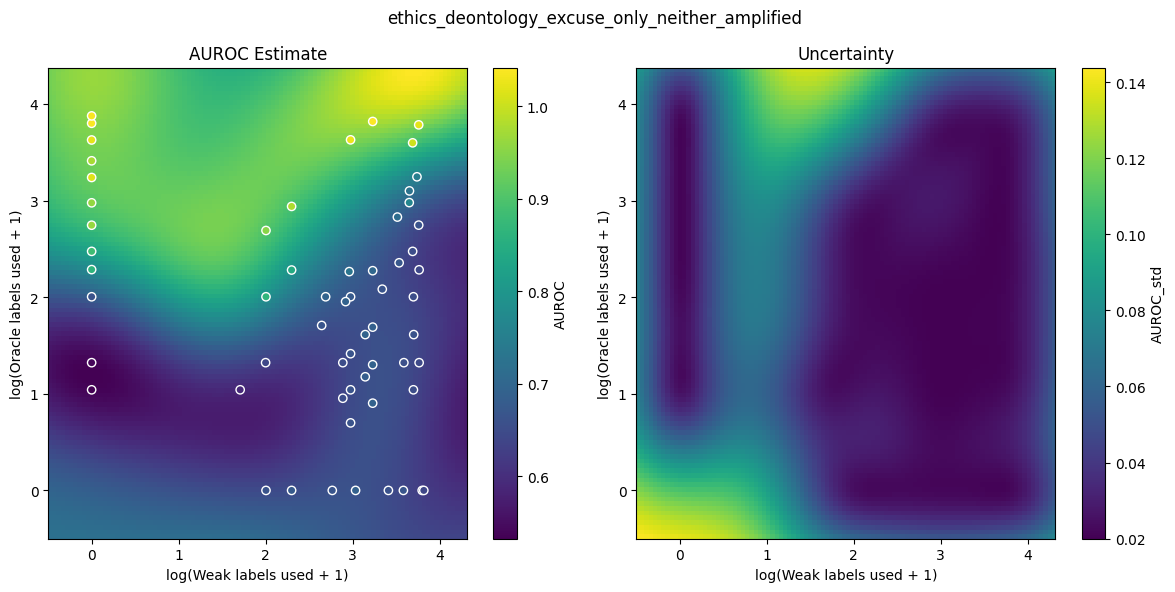

In [394]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel

ds_name = np.random.choice(df["ds_name"].unique())
print(ds_name)
# sweep_name = np.random.choice(["seq_sft", "salience_cfg0"])
# plot_df = df[(df["ds_name"] == ds_name) & (df["sweep_name"] == sweep_name)]
plot_df = df[df["ds_name"] == ds_name]

reparam = "log({x} + 1)"
def reparametrize(x):
    if reparam == "log({x} + 1)":
        return np.log10(x + 1)
    elif reparam == "{x}":
        return x
X = reparametrize(np.stack([plot_df["num_weak"].values, plot_df["num_oracle"].values], axis=1))  # type: ignore
y = plot_df["auroc"]

# Annoyingly, the optimizer also changes the length scale unless I fix it
kernel = 1. * RBF(length_scale=1.0, length_scale_bounds="fixed") + WhiteKernel(noise_level=0.1)
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2, normalize_y=True)


# Fit the model
gp.fit(X, y)

# Create a grid for prediction
x_range = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
y_range = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)
xx, yy = np.meshgrid(x_range, y_range)
Xgrid = np.vstack([xx.ravel(), yy.ravel()]).T

# Predict on the grid
Z, Z_std = gp.predict(Xgrid, return_std=True)  # type: ignore
Z, Z_std = Z.reshape(xx.shape), Z_std.reshape(xx.shape)

# Plot
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
ax = axs[0]
im = ax.imshow(Z, extent=[x_range.min(), x_range.max(), y_range.min(), y_range.max()],
               origin='lower', aspect='auto', cmap='viridis')
ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='w')
plt.colorbar(im, label='AUROC')
ax.set_xlabel(reparam.format(x="Weak labels used"))
ax.set_ylabel(reparam.format(x="Oracle labels used"))
ax.set_title("AUROC Estimate")
ax = axs[1]
im = ax.imshow(Z_std, extent=[x_range.min(), x_range.max(), y_range.min(), y_range.max()],
               origin='lower', aspect='auto', cmap='viridis')
plt.colorbar(im, label='AUROC_std')
ax.set_xlabel(reparam.format(x="Weak labels used"))
ax.set_ylabel(reparam.format(x="Oracle labels used"))
ax.set_title("Uncertainty")
plt.suptitle(f"{ds_name}")
plt.tight_layout()
plt.show()

In [395]:
oracle_affordable = 5000  # if you spent your whole budget on oracle, how many oracle labels could you afford?
weak_affordable = 3000
cost_ratio = weak_affordable / oracle_affordable
n_wo = np.stack([np.linspace(0, weak_affordable, 101), np.linspace(oracle_affordable, 0, 101)], axis=1)
auroc, auroc_cov = gp.predict(reparametrize(n_wo), return_std=False, return_cov=True)  # type: ignore

interp_df = pd.DataFrame({
    "num_weak": n_wo[:, 0],
    "num_oracle": n_wo[:, 1],
    "auroc": auroc,
})
interp_df["oracle_spending_frac"] = cost_ratio * interp_df["num_oracle"] / (cost_ratio * interp_df["num_oracle"] + interp_df["num_weak"])

# we want the expected optimal oracle spending fraction
# we compute the expectation over the gaussian process model
# by sampling a bunch of auroc trajectories and computing the argmax
n_boot = 1000
auroc_samples = gp.sample_y(reparametrize(n_wo), n_samples=n_boot).T
argmaxes = np.argmax(auroc_samples, axis=1)
optimal_spending_frac = interp_df["oracle_spending_frac"].values[argmaxes]
interp_df["expected_optimal_spending_frac"] = optimal_spending_frac.mean()
interp_df["optimal_spending_frac_lo"] = np.percentile(optimal_spending_frac, 2.5)
interp_df["optimal_spending_frac_hi"] = np.percentile(optimal_spending_frac, 97.5)

interp_df

,num_weak,num_oracle,auroc,oracle_spending_frac,expected_optimal_spending_frac,optimal_spending_frac_lo,optimal_spending_frac_hi
0,0.0,5000.0,0.942354,1.00,0.87651,0.66,1.0
1,30.0,4950.0,0.894561,0.99,0.87651,0.66,1.0
2,60.0,4900.0,0.907611,0.98,0.87651,0.66,1.0
3,90.0,4850.0,0.918136,0.97,0.87651,0.66,1.0
4,120.0,4800.0,0.925842,0.96,0.87651,0.66,1.0
...,...,...,...,...,...,...,...
96,2880.0,200.0,0.650260,0.04,0.87651,0.66,1.0
97,2910.0,150.0,0.648453,0.03,0.87651,0.66,1.0
98,2940.0,100.0,0.649049,0.02,0.87651,0.66,1.0
99,2970.0,50.0,0.652932,0.01,0.87651,0.66,1.0


Text(0.5, 1.0, 'ethics_deontology_excuse_only_neither_amplified\n3000 weak affordable, 5000 oracle affordable')

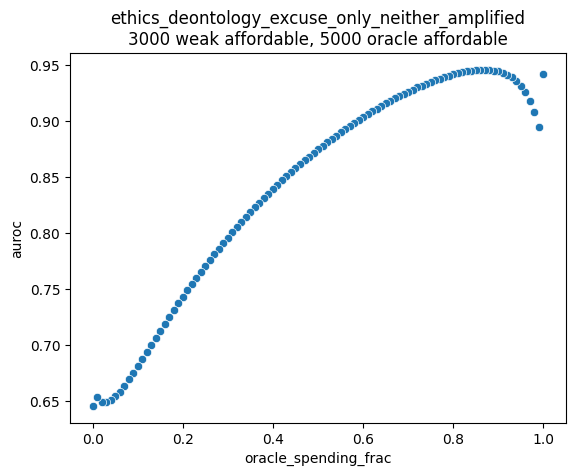

In [396]:
import seaborn as sns

sns.scatterplot(x="oracle_spending_frac", y="auroc", data=interp_df)
plt.title(f"{ds_name}\n{weak_affordable} weak affordable, {oracle_affordable} oracle affordable")

In [397]:
from scipy.stats import linregress
optimal_oracle_spending_frac = interp_df["oracle_spending_frac"].iloc[interp_df["auroc"].argmax()]
r = linregress(interp_df["oracle_spending_frac"], interp_df["auroc"]).rvalue
r

0.9467231612215591

In [398]:
results_df

auroc  \
ds_name                            model_name                             
boolq_Qwen1.5-0.5B                 meta-llama/Meta-Llama-3-8B  0.590323   
                                   meta-llama/Meta-Llama-3-8B  0.937560   
                                   meta-llama/Meta-Llama-3-8B  0.726130   
                                   meta-llama/Meta-Llama-3-8B  0.801273   
                                   meta-llama/Meta-Llama-3-8B  0.872823   
...                                                                 ...   
sciq_support_contains_gt_amplified meta-llama/Meta-Llama-3-8B  0.992666   
                                   meta-llama/Meta-Llama-3-8B  0.977410   
                                   meta-llama/Meta-Llama-3-8B  0.982324   
                                   meta-llama/Meta-Llama-3-8B  0.887139   
                                   meta-llama/Meta-Llama-3-8B  0.975030   

                                                                               model_name  \
ds_name                            model_name                                               
boolq_Qwen1.5-0.5B                 meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
...                                                                                   ...   
sciq_support_contains_gt_amplified meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   
                                   meta-llama/Meta-Llama-3-8B  meta-llama/Meta-Llama-3-8B   

                                                               num_oracle  \
ds_name                            model_name                               
boolq_Qwen1.5-0.5B                 meta-llama/Meta-Llama-3-8B         100   
                                   meta-llama/Meta-Llama-3-8B        3590   
                                   meta-llama/Meta-Llama-3-8B           0   
                                   meta-llama/Meta-Llama-3-8B         676   
                                   meta-llama/Meta-Llama-3-8B         928   
...                                                                   ...   
sciq_support_contains_gt_amplified meta-llama/Meta-Llama-3-8B         582   
                                   meta-llama/Meta-Llama-3-8B         100   
                                   meta-llama/Meta-Llama-3-8B          10   
                                   meta-llama/Meta-Llama-3-8B          20   
                                   meta-llama/Meta-Llama-3-8B           0   

                                                               num_weak  \
ds_name                            model_name                             
boolq_Qwen1.5-0.5B                 meta-llama/Meta-Llama-3-8B         0   
                                   meta-llama/Meta-Llama-3-8B      4350   
                                   meta-llama/Meta-Llama-3-8B       575   
                                   meta-llama/Meta-Llama-3-8B      3033   
                                   meta-llama/Meta-Llama-3-8B         0   
...                                                                 ...   
sciq_support_contains_gt_amplified meta-llama/Meta-Llama-3-8B         0   
                                   meta-llama/Meta-Llama-3-8B       947   
                                   meta-llama/Meta-Llama-3-8B      1776   
                                   meta-llama/Meta-Ll

# Check how much compute was used for each run

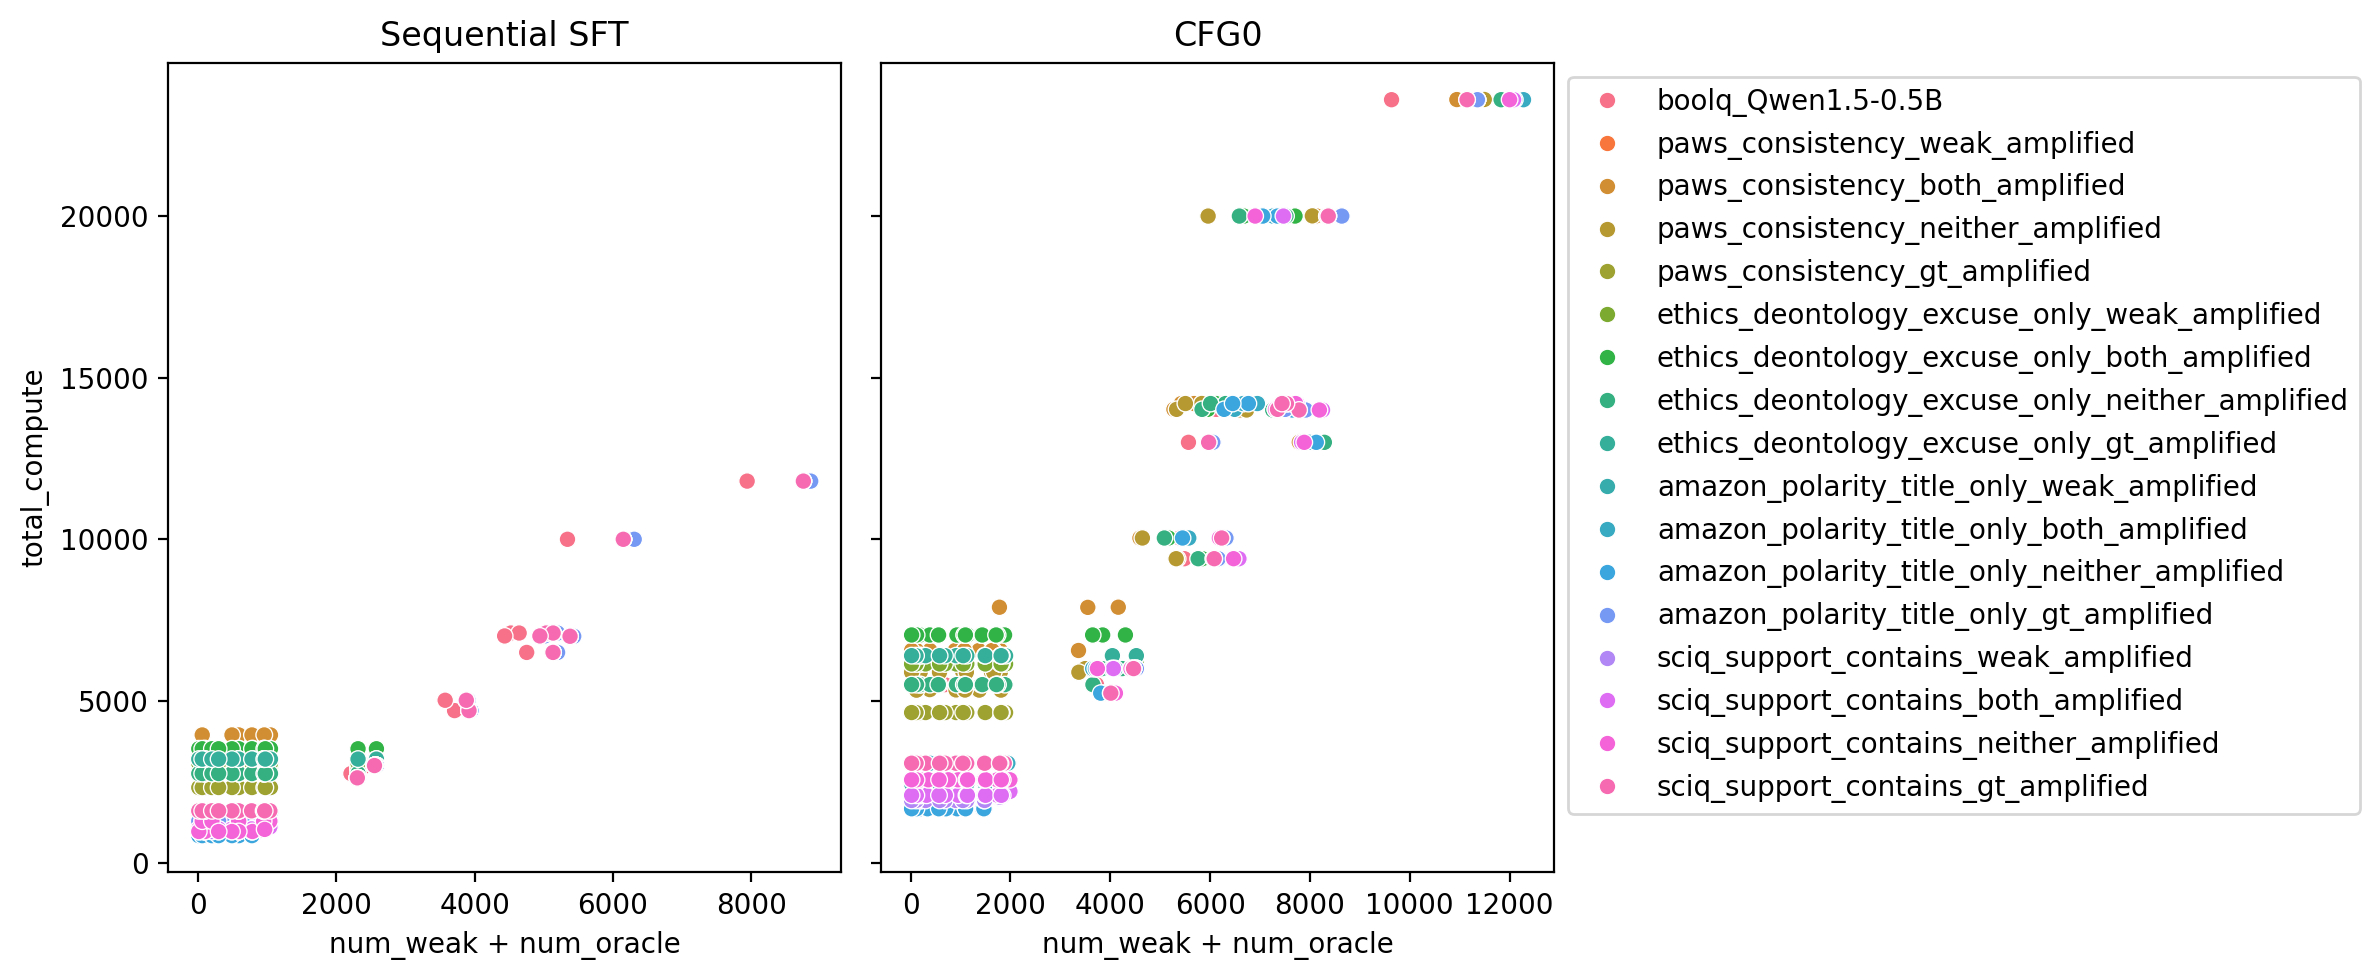

In [530]:
# for "salience_cfg0" and "seq_sft", plot total_compute versus num_oracle, num_oracle + num_weak

fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=True, dpi=200)   
plt.sca(axs[0])
plot_df = results_df[results_df["sweep_name"] == "seq_sft"].copy()
plot_df["num_weak_plus_oracle"] = plot_df["num_weak"] + plot_df["num_oracle"]
sns.scatterplot(x="num_weak_plus_oracle", y="total_compute", data=plot_df, hue="ds_name")
# turn of legend
plt.gca().get_legend().remove()
plt.title("Sequential SFT")
plt.xlabel("num_weak + num_oracle")
plt.sca(axs[1])
plot_df = results_df[results_df["sweep_name"] == "salience_cfg0"].copy()
plot_df["num_weak_plus_oracle"] = plot_df["num_weak"] + plot_df["num_oracle"]
sns.scatterplot(x="num_weak_plus_oracle", y="total_compute", data=plot_df, hue="ds_name")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title("CFG0")
plt.xlabel("num_weak + num_oracle")
plt.tight_layout()

# Get all the interpolated results

In [399]:
# for what values of weak affordable, oracle affordable, weak quality, distractor salience, desired salience should you spend 100% of your budget on oracle labels?
# for this I need to:
#  - take each setting (ds_name; including runs with both configs) and compute the GPR fit
#  - choose a few reasonable values of weak affordable and oracle affordable
#  - sample a few AUROCs from the GP for each pair of weak affordable and oracle affordable for each num oracle 
#  - also get the means (store the samples and means in a dataframe)
#  - if exclusively using oracle labels has a higher mean AUROC than any other fraction, then we consider this optimal

In [400]:
import numpy as np

def sigmoid_sparse_range(start, end, approx_num_points):
    """
    We use this to sample numbers of points because we want more precision near the boundaries 
    where n_weak or n_oracle is small
    """
    def sigmoid(x):
        return 1 / (1 + np.exp(-x))
    
    assert isinstance(start, int) and isinstance(end, int)

    # Generate evenly spaced points in the range [-6, 6]
    x = np.linspace(-7, 7, approx_num_points)

    # Apply sigmoid function
    y = sigmoid(x)

    # Scale to desired range
    scaled = y * (end - start) + start

    # Round to nearest integer and remove duplicates
    result = np.unique(np.round(scaled).astype(int))

    # Ensure start and end are included
    if result[0] != start:
        result = np.insert(result, 0, start)
    if result[-1] != end:
        result = np.append(result, end)

    return result

# Example usage
result = sigmoid_sparse_range(0, int(1e2), 20)
print(result)

[  0   1   2   4   7  14  25  41  59  75  86  93  96  98  99 100]


In [384]:
salience_df = get_salience_df(models=models, ds_names=None)

'meta-llama/Meta-Llama-3-8B'

In [495]:
from tqdm import tqdm
# optimal spending frac vs: weak quality, weak_affordable, oracle_affordable, distractor salience, desired salience
# TODO: include error bars based on GP std

results = []
for row in tqdm(salience_df.iloc, total=len(salience_df)):
    for weak_affordable in 10 ** np.linspace(1, 4, 4):
        for oracle_affordable in 10 ** np.linspace(1, 4, 4):
            if oracle_affordable > weak_affordable:
                continue
            ds_name, model_name = row.name
            curr_df = results_df[(results_df["ds_name"] == ds_name) & (results_df["model_name"] == model_name)]
            if len(curr_df) == 0:
                continue
            X = reparametrize(np.stack([curr_df["num_weak"].values, curr_df["num_oracle"].values], axis=1))  # type: ignore
            y = curr_df["auroc"]
            cost_ratio = weak_affordable / oracle_affordable

            kernel = 1.0 * RBF(length_scale=1.0, length_scale_bounds="fixed") + WhiteKernel(noise_level=0.1)
            gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=2, normalize_y=True)

            # Fit the model
            gp.fit(X, y)

            # get samples and means
            n_wo = []
            for n_oracle in sigmoid_sparse_range(0, oracle_affordable, 20):
                frac_budget_left = 1 if n_oracle == 0 else 1 - n_oracle / oracle_affordable
                n_weak = int(weak_affordable * frac_budget_left)
                n_wo.append([n_weak, n_oracle])
            n_wo = np.array(n_wo)
            
            auroc, auroc_std = gp.predict(reparametrize(n_wo), return_std=True)
            oracle_spending_fracs = cost_ratio * n_wo[:, 1] / (cost_ratio * n_wo[:, 1] + n_wo[:, 0])
            optimal_spending_frac = oracle_spending_fracs[auroc.argmax()]
            n_boot = 1000
            auroc_samples = gp.sample_y(reparametrize(n_wo), n_samples=n_boot).T
            # note that it doesn't make sense to sample and then take argmaxes, 
            # because it heavily depends on variance and n
            results.append({
                "ds_name": ds_name,
                "model_name": model_name,
                "weak_label_auroc": row["weak_label_auroc"],
                "weak_label_acc": row["weak_label_acc"],
                "max_auroc": auroc.max(),
                "max_auroc_std": auroc_std[auroc.argmax()],
                "optimal_spending_frac": optimal_spending_frac,
                "auroc_samples": auroc_samples,
                "aurocs": auroc,
                "auroc_stds": auroc_std,
                "oracle_spending_fracs": oracle_spending_fracs,
                "salience_weak": row["salience_weak"],
                "salience_oracle": row["salience_oracle"],
                "weak_affordable": weak_affordable,
                "oracle_affordable": oracle_affordable,
            })

all_df = pd.DataFrame(results)

100%|██████████| 17/17 [00:10<00:00,  1.63it/s]


In [496]:
all_df.to_pickle("results/optimal_spending_frac.pkl")

In [497]:
all_df = pd.read_pickle("results/optimal_spending_frac.pkl")

In [498]:
import matplotlib.pyplot as plt
import numpy as np

def parallel_lines_chart(data, feature_names, class_labels=None, colors=None, jitter=0.):
    """
    Create a parallel lines chart.
    
    :param data: 2D array where each row is an instance and each column a feature
    :param feature_names: List of feature names
    :param class_labels: List of class labels for each instance (optional)
    :param colors: List of colors for each class (optional)
    """
    fig, ax = plt.subplots(figsize=(12, 6))

    # Number of features
    num_features = data.shape[1]

    # Create x-axis points for each feature
    x = list(range(num_features))

    # Plot each instance
    for i, instance in enumerate(data):
        if class_labels is not None and colors is not None:
            color = colors[class_labels[i]]
        else:
            color = 'gray'
        
        jit = np.random.uniform(-jitter, jitter, num_features)
        ax.plot(x, instance + jit, c=color, alpha=0.3)

    # Set x-ticks and labels
    ax.set_xticks(x)
    ax.set_xticklabels(feature_names)
    # rotate
    plt.xticks(rotation=45, ha="right")

    # Set y-axis limits
    ax.set_ylim(data.min().min(), data.max().max())

    # Add a legend if class labels are provided
    if class_labels is not None and colors is not None:
        unique_labels = np.unique(class_labels)
        legend_elements = [plt.Line2D([0], [0], color=colors[label], label=label) 
                           for label in unique_labels]
        ax.legend(handles=legend_elements)

    plt.title('Parallel Lines Chart')
    plt.tight_layout()
    plt.show()

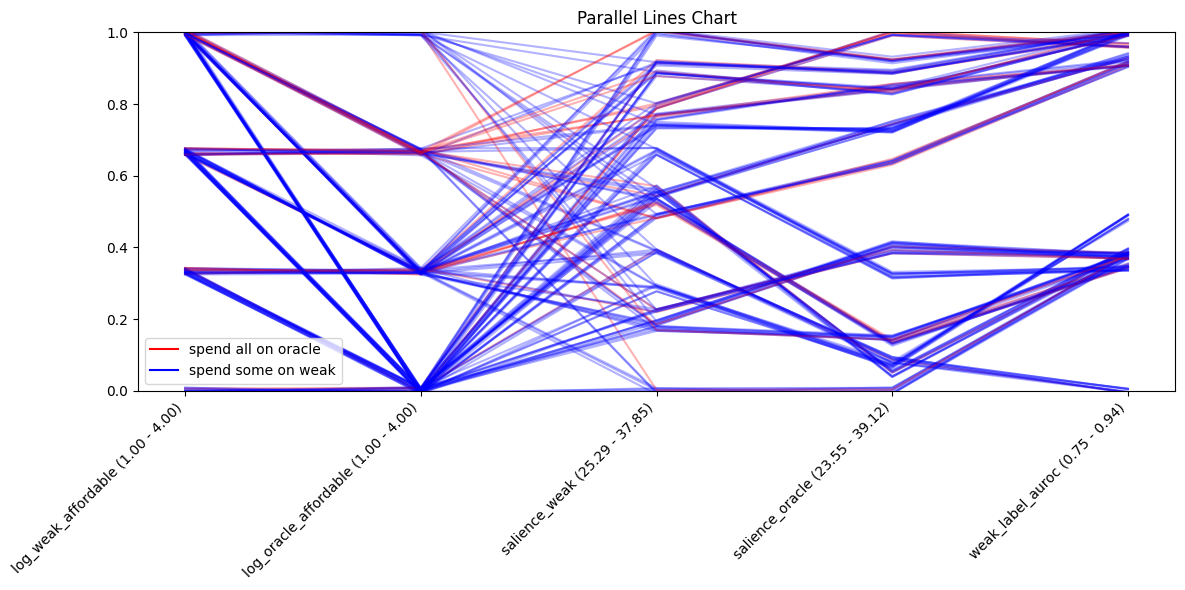

In [509]:
all_df["log_weak_affordable"] = np.log10(all_df["weak_affordable"])
all_df["log_oracle_affordable"] = np.log10(all_df["oracle_affordable"])
features = ["log_weak_affordable", "log_oracle_affordable", "salience_weak", "salience_oracle", "weak_label_auroc"]
data_raw = all_df[features].values
# normalize to [0, 1]
data = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
feature_names = [f"{f} ({d.min():.2f} - {d.max():.2f})" for f, d in zip(features, data_raw.T)]
class_labels = np.where(all_df["optimal_spending_frac"].values == 1, "spend all on oracle", "spend some on weak")
colors = {"spend all on oracle": "red", "spend some on weak": "blue"}
# data = data[class_labels == "spend all on oracle"]
# class_labels = class_labels[class_labels == "spend all on oracle"]

parallel_lines_chart(data, feature_names, class_labels, colors, jitter=0.01)


In [500]:
for lo, up in [(0, 0), (0, 0.1), (0.1, 0.9), (0.9, 1), (1, 1)]:
    print(f"Fraction of runs where optimal oracle spending frac is between {lo} and {up}:")
    print("\t" + str(((all_df["optimal_spending_frac"] <= up) & (all_df["optimal_spending_frac"] >= lo)).mean()))

Fraction of runs where optimal oracle spending frac is between 0 and 0:
	0.3
Fraction of runs where optimal oracle spending frac is between 0 and 0.1:
	0.36470588235294116
Fraction of runs where optimal oracle spending frac is between 0.1 and 0.9:
	0.3176470588235294
Fraction of runs where optimal oracle spending frac is between 0.9 and 1:
	0.32941176470588235
Fraction of runs where optimal oracle spending frac is between 1 and 1:
	0.16470588235294117


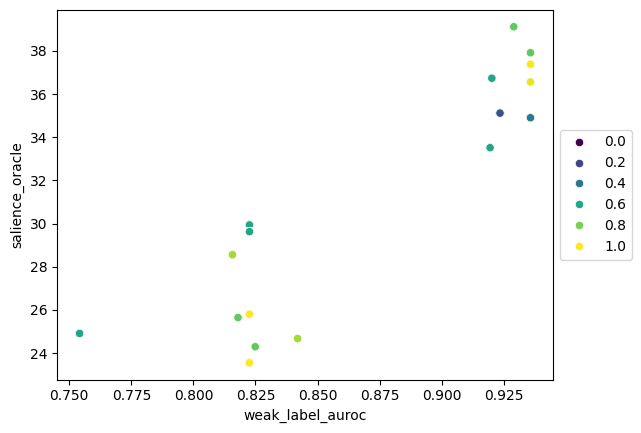

In [501]:
sns.scatterplot(x="weak_label_auroc", y="salience_oracle", hue="optimal_spending_frac", data=all_df, palette="viridis")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))

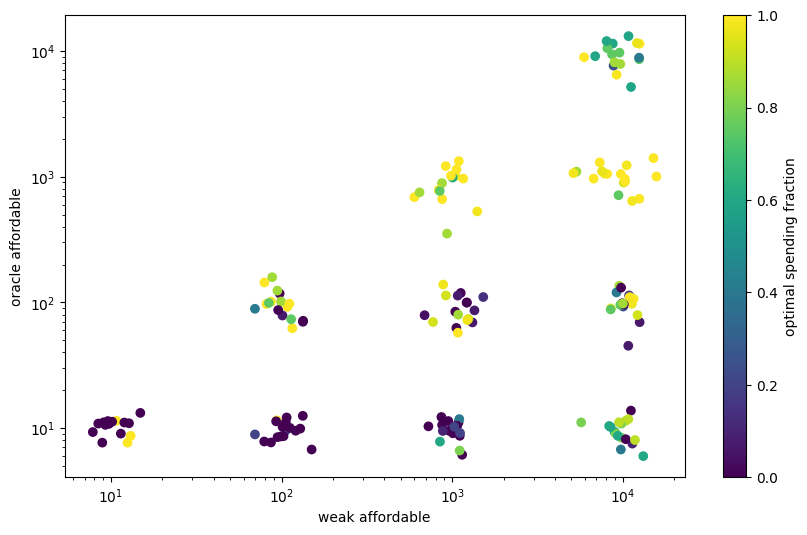

In [502]:

plt.figure(figsize=(10, 6))
# sns.scatterplot(x="weak_affordable", y="oracle_affordable", hue="optimal_spending_frac", data=gb_df, alpha=0.8, palette="viridis")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
jitter = 0.2
jitterx = np.random.normal(0, jitter, len(all_df))
jittery = np.random.normal(0, jitter, len(all_df))
plt.scatter(all_df["weak_affordable"] * (1 + jitterx), all_df["oracle_affordable"] * (1 + jittery), c=all_df["optimal_spending_frac"], cmap="viridis")
plt.colorbar(label="optimal spending fraction")
plt.loglog()
plt.xlabel("weak affordable")
plt.ylabel("oracle affordable")
plt.show()

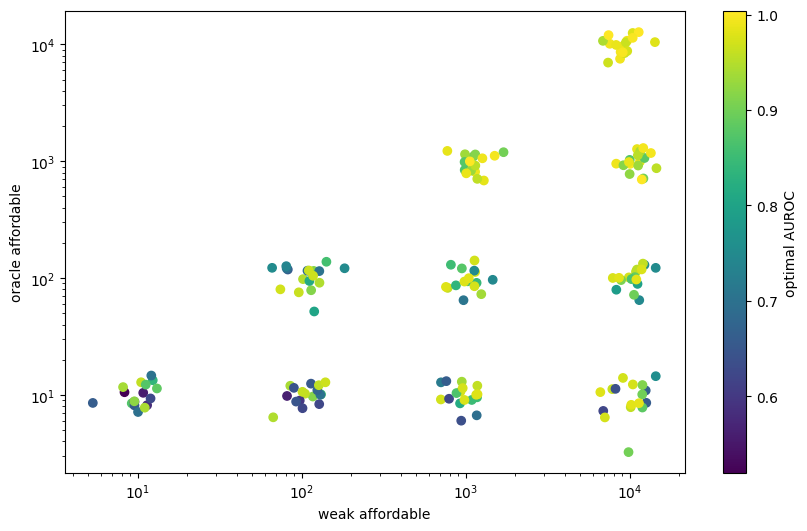

In [507]:
plt.figure(figsize=(10, 6))
# sns.scatterplot(x="weak_affordable", y="oracle_affordable", hue="optimal_spending_frac", data=gb_df, alpha=0.8, palette="viridis")
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
jitter = 0.2
jitterx = np.random.normal(0, jitter, len(all_df))
jittery = np.random.normal(0, jitter, len(all_df))
plt.scatter(all_df["weak_affordable"] * (1 + jitterx), all_df["oracle_affordable"] * (1 + jittery), c=all_df["max_auroc"], cmap="viridis")
plt.colorbar(label="optimal AUROC")
plt.loglog()
plt.xlabel("weak affordable")
plt.ylabel("oracle affordable")
plt.show()

Text(0, 0.5, 'oracle salience')

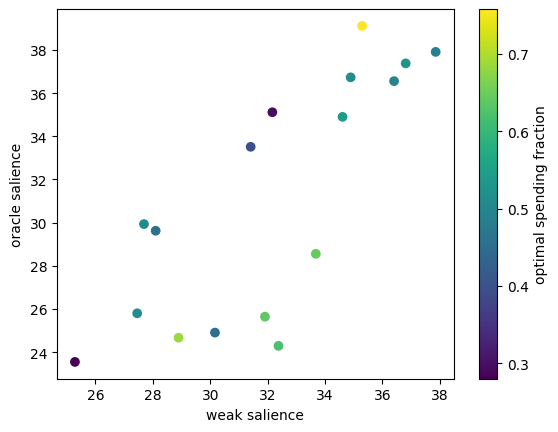

In [503]:
gb_df = all_df.groupby(["salience_weak", "salience_oracle"]).mean(numeric_only=True).reset_index()
plt.scatter(gb_df["salience_weak"], gb_df["salience_oracle"], c=gb_df["optimal_spending_frac"], cmap="viridis")
plt.colorbar(label="optimal spending fraction")
plt.xlabel("weak salience")
plt.ylabel("oracle salience")


In [504]:
# do multiple linear regression of optimal spending frac on weak quality, log_weak_affordable, log_oracle_affordable, distractor salience, desired salience
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

all_df["log_weak_affordable"] = np.log10(all_df["weak_affordable"])
all_df["log_oracle_affordable"] = np.log10(all_df["oracle_affordable"])
X = all_df[["weak_label_auroc", "log_weak_affordable", "log_oracle_affordable", "salience_weak", "salience_oracle"]].values
y = all_df["optimal_spending_frac"].values
lr = LinearRegression()
lr.fit(X, y)
lr.coef_

array([-0.75560395,  0.07984753,  0.19484806,  0.02712343, -0.0063484 ])

                              OLS Regression Results                             
Dep. Variable:     optimal_spending_frac   R-squared:                       0.346
Model:                               OLS   Adj. R-squared:                  0.326
Method:                    Least Squares   F-statistic:                     17.33
Date:                   Tue, 09 Jul 2024   Prob (F-statistic):           9.34e-14
Time:                           23:15:54   Log-Likelihood:                -61.569
No. Observations:                    170   AIC:                             135.1
Df Residuals:                        164   BIC:                             154.0
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


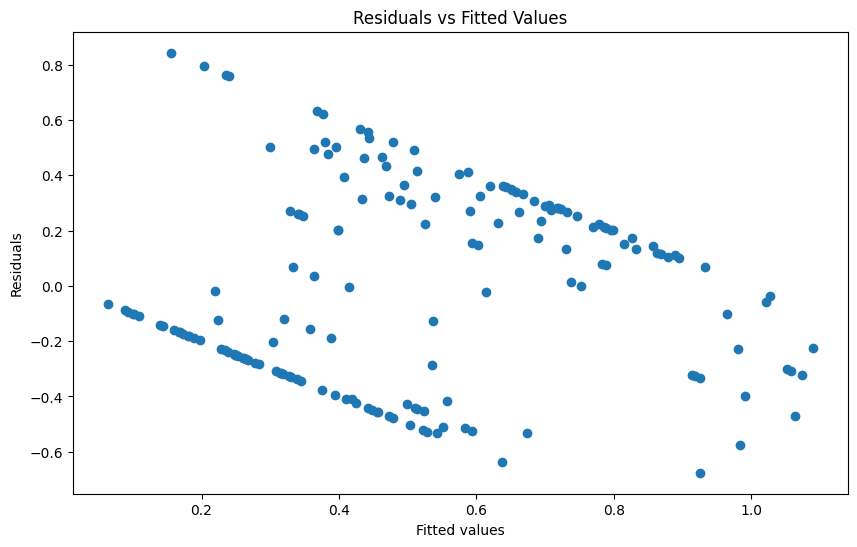

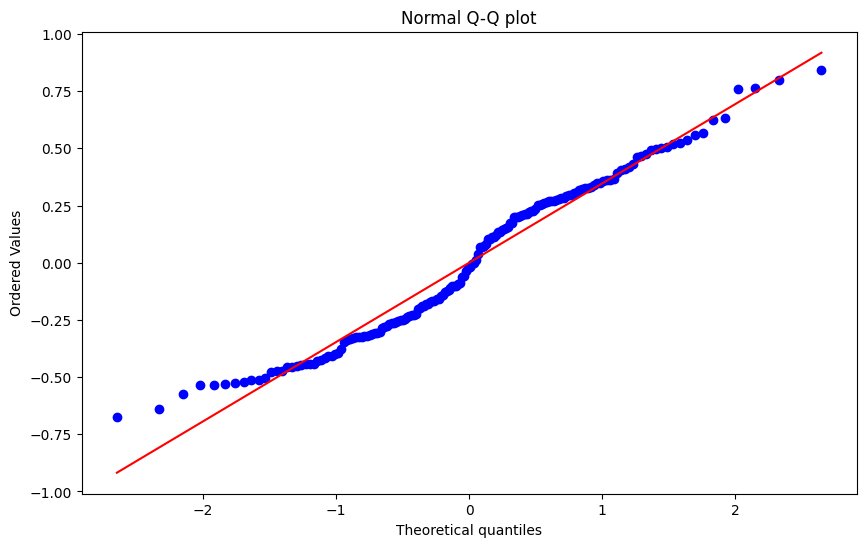


Sklearn Coefficients:
weak_label_auroc: -0.7556039453037496
log_weak_affordable: 0.07984752914789792
log_oracle_affordable: 0.19484806142794098
salience_weak: 0.02712342856514416
salience_oracle: -0.006348396714034671


In [510]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats

# Assuming all_df is your DataFrame
# If it's not defined, you need to load your data into all_df

# Prepare the data
X = all_df[["weak_label_auroc", "log_weak_affordable", "log_oracle_affordable", "salience_weak", "salience_oracle"]]
# X = all_df[["weak_label_auroc", "log_weak_affordable", "log_oracle_affordable", "salience_weak", "salience_oracle"]]
y = all_df["optimal_spending_frac"]

# Statsmodels regression (for detailed statistics)
X_sm = sm.add_constant(X)  # Add a constant term to the independent variables
model = sm.OLS(y, X_sm).fit()

# Print the summary of the regression
print(model.summary())

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X_sm.columns
vif_data["VIF"] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data)

# Residual analysis
residuals = model.resid
fitted_values = model.fittedvalues

# Plot residuals vs fitted values
plt.figure(figsize=(10, 6))
plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()

# Normal Q-Q plot of residuals
fig, ax = plt.subplots(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=ax)
ax.set_title("Normal Q-Q plot")
plt.show()

# Sklearn regression (for coefficients)
lr = LinearRegression()
lr.fit(X, y)
print("\nSklearn Coefficients:")
for name, coef in zip(X.columns, lr.coef_):
    print(f"{name}: {coef}")

LinregressResult(slope=-0.09503332630450424, intercept=0.6017206689502823, rvalue=-0.013087293960989151, pvalue=0.865493241852513, stderr=0.5601885613341814, intercept_stderr=0.48818285659810207)

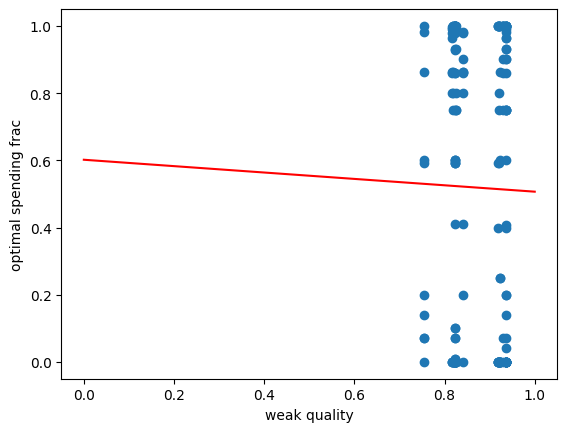

In [506]:
# linear regressiong of optimal spending frac on weak quality
l = linregress(all_df["weak_label_auroc"], all_df["optimal_spending_frac"])
plt.scatter(all_df["weak_label_auroc"], all_df["optimal_spending_frac"])
plt.plot([0, 1], [l.intercept, l.intercept + l.slope], color="red")

plt.xlabel("weak quality")
plt.ylabel("optimal spending frac")
l

0.0
0.5000000000000001
1.0


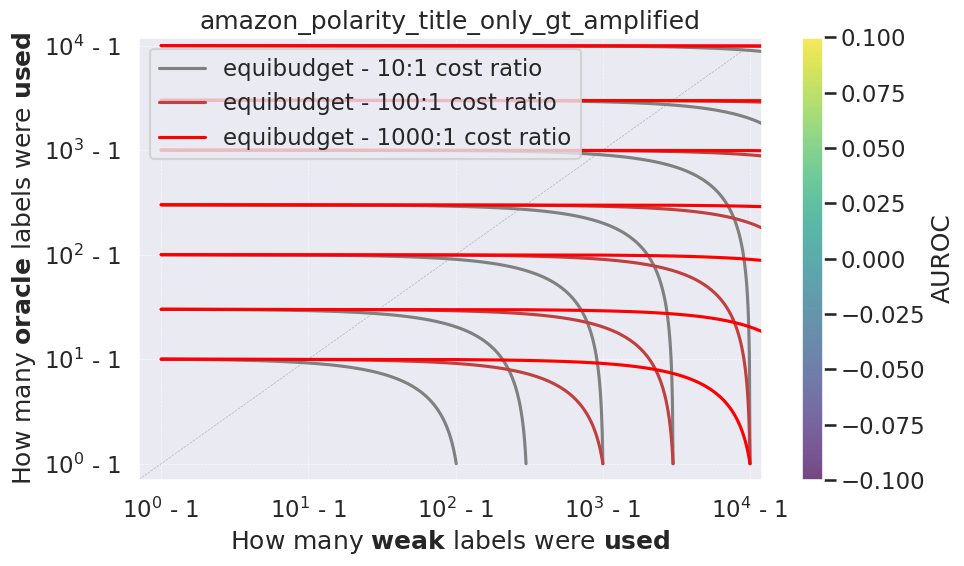

In [248]:
import numpy as np
from matplotlib.colors import Normalize, LinearSegmentedColormap
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 6))

# ds_name = "boolq_Qwen1.5-0.5B"
ds_name = "amazon_polarity_title_only_gt_amplified"
plot_df = df[df["ds_name"] == ds_name]
min_auroc = round(plot_df["auroc"].quantile(0.25), 2)
max_auroc = round(plot_df["auroc"].max(), 2)
# Create a scatter plot with total_spent on x-axis and oracle_cost on y-axis
jitter = 0.0
norm = Normalize(vmin=min_auroc, vmax=max_auroc)
colors = plt.cm.viridis(np.linspace(0, 1, 256))
n_bins = 256
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=n_bins)
cmap.set_under('black')
scatter = ax.scatter((plot_df['num_weak'] + 1) * np.random.normal(1, jitter, len(plot_df)), (plot_df['num_oracle'] + 1) * np.random.normal(1, jitter, len(plot_df)), c=plot_df['auroc'], cmap=cmap, s=100, norm=norm, alpha=0.7)
plt.plot([0, 9000], [0, 9000], color="gray", linestyle="--", alpha=0.5, linewidth=0.5)

cmap = LinearSegmentedColormap.from_list('gray_to_red', ["gray", "red"], N=256)
crs = [10, 100, 1000]
for cost_ratio in crs:
    # color should be near gray if log(cr) is small, and near red if log(cr) is large
    color = (np.log(cost_ratio) - min(map(np.log, crs))) / (max(map(np.log, crs)) - min(map(np.log, crs))) 
    print(color)
    color = cmap(color)
    for oint in [10, 30, 100, 300, 1000, 3000, 10_000]:
        plt.plot(np.linspace(oint * cost_ratio + 1, 1, 101), np.linspace(1, oint, 101), color=color, linestyle="-", label=f"equibudget - {cost_ratio}:1 cost ratio" if oint == 10 else None)
plt.legend()

# Set labels and title
ax.set_xlabel("How many $\\bf{weak}$ labels were $\\bf{used}$")
ax.set_ylabel("How many $\\bf{oracle}$ labels were $\\bf{used}$")
ax.set_title(f"{ds_name}")

plt.loglog()
# replace tick labels with 10^i - 1
ticks = [1, 10, 100, 1000, 10000]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels([f"$10^{int(np.log10(tick))}$ - 1" for tick in ticks])
ax.set_yticklabels([f"$10^{int(np.log10(tick))}$ - 1" for tick in ticks])
ax.set_xlim(0.7, 12_000)
ax.set_ylim(0.7, 12_000)

cbar = plt.colorbar(scatter)
cbar.set_label('AUROC')

ax.grid(True, linestyle='--', alpha=0.7, linewidth=0.5)

plt.tight_layout()
plt.show()


NameError: name 'f_df' is not defined

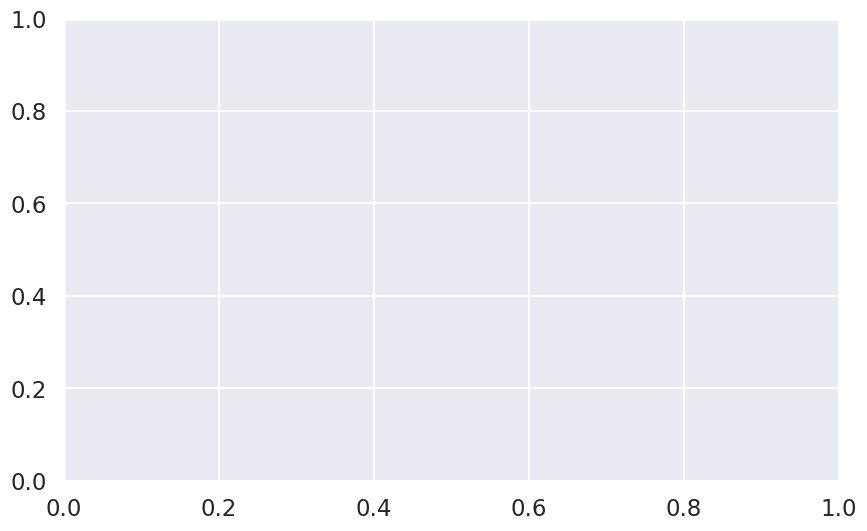

In [249]:
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))

ds_name = "amazon_polarity_title_only"
plot_df = f_df[f_df["ds_name"] == ds_name]
min_auroc = round(plot_df["auroc"].quantile(0.5), 2)
max_auroc = round(plot_df["auroc"].max(), 2)
# plot_df = plot_df[plot_df["auroc"] > min_auroc]
# Create a scatter plot with total_spent on x-axis and oracle_cost on y-axis
jitter = 0.1
scatter = ax.scatter((plot_df['max_weak'] + 1) * np.random.normal(1, jitter, len(plot_df)), (plot_df['max_oracle'] + 1) * np.random.normal(1, jitter, len(plot_df)), c=plot_df['frac_spent_on_oracle'], cmap='viridis', s=((plot_df["auroc"] - min_auroc) * 250 / (max_auroc - min_auroc)).apply(lambda x: max(10, x)), marker='o', alpha=0.7)
plt.plot([0, 9000], [0, 9000], color="black", linestyle="--")

# Set labels and title
ax.set_xlabel("How many $\\bf{weak}$ labels can be $\\bf{afforded}$")
ax.set_ylabel("How many $\\bf{oracle}$ labels can be $\\bf{afforded}$")
ax.set_title(f"{ds_name}")

plt.loglog()
# replace tick labels with 10^i - 1
ticks = [1, 10, 100, 1000, 10000]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels([f"$10^{int(np.log10(tick))}$ - 1" for tick in ticks])
ax.set_yticklabels([f"$10^{int(np.log10(tick))}$ - 1" for tick in ticks])

cbar = plt.colorbar(scatter)
cbar.set_label(f'Fraction of budget spent on oracle\nsize $\\approx$ (AUROC - {min_auroc}) / {max_auroc - min_auroc:.2f}')

ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [250]:
df[df["ds_name"] == "amazon_polarity_title_only"].sort_values("auroc", ascending=False)

,auroc,num_oracle,num_weak,seed,ds_name,name_oracle,name_weak,loss_auc_oracle,loss_auc_weak,salience_oracle,...,steps_oracle,steps_weak,losses_oracle,losses_weak,aurocs_oracle,aurocs_weak,smallest_good_num_points_oracle,smallest_good_num_points_weak,weak_label_acc,weak_label_auroc
ds_name,,,,,,,,,,,,,,,,,,,,,


In [ ]:
# possible observations:
#  - num_oracle is the main predictor of performance
#  - using <=100 oracle examples with a bunch of weak examples only partially resolve the gap (for our learning method) ~=> don't use weak labels unless they're wayyy cheaper
#  - for ethics deontology (a harder, less gt-salient, task), the weak labels don't get you much